## Part 1: PCA and Variance Threshold in a Linear Regression

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import sklearn
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

### 1. Import the housing data as a data frame and ensure that the data is loaded properly.

In [2]:
# Display all the columns and rows without an ellipses so they can all be seen
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#load the House Price  data into a dataframe
df = pd.read_csv('housing_train.csv') 
df.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [4]:
# Display the rows and columns of the dataframe
df.shape

(1460, 81)

### 2. Drop the "Id" column and any features that are missing more than 40% of their values.

In [5]:
# Determine columns missing  40% of their values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Id,Id,0.000000
MSSubClass,MSSubClass,0.000000
MSZoning,MSZoning,0.000000
LotFrontage,LotFrontage,17.739726
LotArea,LotArea,0.000000
Street,Street,0.000000
Alley,Alley,93.767123
LotShape,LotShape,0.000000
LandContour,LandContour,0.000000
Utilities,Utilities,0.000000


In [6]:
# Remove the id column
# Features with more than 40% of values missing: Alley, FireplaceQu, PoolQC, Fence, MiscFeature
df = df.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'] , axis=1)
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
# check that these columns have been removed
df.shape

(1460, 75)

### 3. For numerical columns, fill in any missing data with the median value.

In [8]:
# Summarize the numeric columns in the dataframe
numCols = df.select_dtypes("number").columns
numCols= list(set(numCols))
numCols

['GarageCars',
 'GarageYrBlt',
 'OverallQual',
 'SalePrice',
 'GrLivArea',
 'OverallCond',
 'BsmtFinSF2',
 'PoolArea',
 'FullBath',
 'MiscVal',
 'KitchenAbvGr',
 'MasVnrArea',
 'LotArea',
 'YearRemodAdd',
 'OpenPorchSF',
 'LotFrontage',
 'GarageArea',
 'BedroomAbvGr',
 'Fireplaces',
 'MoSold',
 'BsmtFullBath',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'LowQualFinSF',
 'EnclosedPorch',
 'HalfBath',
 'BsmtUnfSF',
 '1stFlrSF',
 'TotalBsmtSF',
 '3SsnPorch',
 '2ndFlrSF',
 'YearBuilt',
 'WoodDeckSF',
 'MSSubClass',
 'ScreenPorch',
 'YrSold',
 'BsmtFinSF1']

In [9]:
# Median value of all the numerical columns
df.median()

MSSubClass           50.0
LotFrontage          69.0
LotArea            9478.5
OverallQual           6.0
OverallCond           5.0
YearBuilt          1973.0
YearRemodAdd       1994.0
MasVnrArea            0.0
BsmtFinSF1          383.5
BsmtFinSF2            0.0
BsmtUnfSF           477.5
TotalBsmtSF         991.5
1stFlrSF           1087.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1464.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          6.0
Fireplaces            1.0
GarageYrBlt        1980.0
GarageCars            2.0
GarageArea          480.0
WoodDeckSF            0.0
OpenPorchSF          25.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        163000.0
dtype: float64

In [10]:
# fill the missing values with the median from the numeric columns
df = df.fillna(df.median())
df.head(8)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,69.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000


In [11]:
# Double check shape of dataframe
df.shape

(1460, 75)

### 4. For categorical columns, fill in any missing data with the most common value (mode).

In [13]:
# Summarize the categorical columns in the dataframe
catCols = df.select_dtypes("object").columns
catCols= list(set(catCols))
catCols

['LotConfig',
 'LandSlope',
 'BsmtQual',
 'MasVnrType',
 'BsmtFinType2',
 'Functional',
 'Condition2',
 'RoofMatl',
 'LotShape',
 'GarageType',
 'KitchenQual',
 'Neighborhood',
 'Condition1',
 'Exterior2nd',
 'BsmtCond',
 'Foundation',
 'GarageFinish',
 'RoofStyle',
 'Heating',
 'Street',
 'SaleCondition',
 'MSZoning',
 'ExterQual',
 'Utilities',
 'GarageCond',
 'BsmtExposure',
 'GarageQual',
 'Electrical',
 'LandContour',
 'HouseStyle',
 'ExterCond',
 'BldgType',
 'CentralAir',
 'HeatingQC',
 'PavedDrive',
 'BsmtFinType1',
 'Exterior1st',
 'SaleType']

In [14]:
# find the mode
mode = df.mode()
mode

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,RL,69.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,2006,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,0,0,GasA,Ex,Y,SBrkr,864,0,0,864,0,0,2,0,3,1,TA,6,Typ,0,Attchd,1980.0,Unf,2,0,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,140000


In [15]:
# fill in any missing categorical data with the most common value (mode)
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])
df['KitchenQual'] = df['KitchenQual'].fillna(df['KitchenQual'].mode()[0])
df['LotShape'] = df['LotShape'].fillna(df['LotShape'].mode()[0])
df['Neighborhood'] = df['Neighborhood'].fillna(df['Neighborhood'].mode()[0])
df['LotConfig'] = df['LotConfig'].fillna(df['LotConfig'].mode()[0])
df['HouseStyle'] = df['HouseStyle'].fillna(df['HouseStyle'].mode()[0])
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Foundation'] = df['Foundation'].fillna(df['Foundation'].mode()[0])
df['SaleType'] = df['SaleType'].fillna(df['SaleType'].mode()[0])
df['Heating'] = df['Heating'].fillna(df['Heating'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['Street'] = df['Street'].fillna(df['Street'].mode()[0])
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])
df['BldgType'] = df['BldgType'].fillna(df['BldgType'].mode()[0])
df['RoofMatl'] = df['RoofMatl'].fillna(df['RoofMatl'].mode()[0])
df['LandContour'] = df['LandContour'].fillna(df['LandContour'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['HeatingQC'] = df['HeatingQC'].fillna(df['HeatingQC'].mode()[0])
df['CentralAir'] = df['CentralAir'].fillna(df['CentralAir'].mode()[0])
df['ExterCond'] = df['ExterCond'].fillna(df['ExterCond'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['RoofStyle'] = df['RoofStyle'].fillna(df['RoofStyle'].mode()[0])
df['LandSlope'] = df['LandSlope'].fillna(df['LandSlope'].mode()[0])
df['Functional'] = df['Functional'].fillna(df['Functional'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['Condition1'] = df['Condition1'].fillna(df['Condition1'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])
df['PavedDrive'] = df['PavedDrive'].fillna(df['PavedDrive'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['Condition2'] = df['Condition2'].fillna(df['Condition2'].mode()[0])
df['SaleCondition'] = df['SaleCondition'].fillna(df['SaleCondition'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['ExterQual'] = df['ExterQual'].fillna(df['ExterQual'].mode()[0])

In [16]:
# Double check shape of dataframe
df.shape

(1460, 75)

In [17]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


### 5. Convert the categorical columns to dummy variables.

In [19]:
catCols

['LotConfig',
 'LandSlope',
 'BsmtQual',
 'MasVnrType',
 'BsmtFinType2',
 'Functional',
 'Condition2',
 'RoofMatl',
 'LotShape',
 'GarageType',
 'KitchenQual',
 'Neighborhood',
 'Condition1',
 'Exterior2nd',
 'BsmtCond',
 'Foundation',
 'GarageFinish',
 'RoofStyle',
 'Heating',
 'Street',
 'SaleCondition',
 'MSZoning',
 'ExterQual',
 'Utilities',
 'GarageCond',
 'BsmtExposure',
 'GarageQual',
 'Electrical',
 'LandContour',
 'HouseStyle',
 'ExterCond',
 'BldgType',
 'CentralAir',
 'HeatingQC',
 'PavedDrive',
 'BsmtFinType1',
 'Exterior1st',
 'SaleType']

In [20]:
# Create dummy variables for the origin column
df = pd.concat([df.drop(['BsmtQual','MSZoning','KitchenQual','LotShape','Neighborhood','LotConfig','HouseStyle','Exterior1st','Foundation','SaleType','Heating','BsmtCond','BsmtExposure','Street','Utilities','BldgType','RoofMatl','LandContour','BsmtFinType1','HeatingQC','CentralAir','ExterCond','BsmtFinType2','MasVnrType','GarageType','Electrical','RoofStyle','LandSlope','Functional','GarageFinish','Condition1','Exterior2nd','PavedDrive','GarageCond','Condition2','SaleCondition','GarageQual','ExterQual'], axis=1), pd.get_dummies(df[['BsmtQual','MSZoning','KitchenQual','LotShape','Neighborhood','LotConfig','HouseStyle','Exterior1st','Foundation','SaleType','Heating','BsmtCond','BsmtExposure','Street','Utilities','BldgType','RoofMatl','LandContour','BsmtFinType1','HeatingQC','CentralAir','ExterCond','BsmtFinType2','MasVnrType','GarageType','Electrical','RoofStyle','LandSlope','Functional','GarageFinish','Condition1','Exterior2nd','PavedDrive','GarageCond','Condition2','SaleCondition','GarageQual','ExterQual']])], axis=1)

In [21]:
# Double check shape of dataframe (increased from 75 columns to 271)
df.shape

(1460, 271)

In [22]:
# Check the dataframe
df.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,PavedDrive_N,PavedDrive_P,PavedDrive_Y,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Co

In [184]:
# Check all column names in the dataframe
for col_name in df.columns: 
    print(col_name)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
BsmtQual_Ex
BsmtQual_Fa
BsmtQual_Gd
BsmtQual_TA
MSZoning_C (all)
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
KitchenQual_Ex
KitchenQual_Fa
KitchenQual_Gd
KitchenQual_TA
LotShape_IR1
LotShape_IR2
LotShape_IR3
LotShape_Reg
Neighborhood_Blmngtn
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown


### 6. Split the data into a training and test set, where the SalePrice column is the target.

In [23]:
#split the data into a training and test set
X = df.drop(['SalePrice'], axis = 1)
#get the target
y = df['SalePrice']
#split the data into training and test sets (80% Training/20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train = X_train.reset_index(drop = True) #drop + True drops the previous index
X_test = X_test.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [24]:
#show the sizes of the training and test sets
print(X_train.shape)
print(X_test.shape)
#see how many survived and deaths are in training and test sets
print(y_train.value_counts())
print(y_test.value_counts())

(1168, 270)
(292, 270)
135000    16
140000    16
155000    13
110000    12
190000    11
115000    11
145000    11
160000     9
130000     9
100000     8
143000     8
250000     8
141000     7
125000     7
230000     7
139000     7
180000     7
165000     7
200000     7
144000     7
235000     7
127000     7
185000     7
225000     6
157000     6
170000     6
124000     6
181000     6
147000     6
113000     6
158000     6
175000     6
215000     6
112000     6
133000     6
119000     6
205000     5
120000     5
192000     5
240000     5
108000     5
173000     5
127500     5
174000     5
136500     5
132500     5
137000     5
148000     5
129000     5
137500     5
176000     5
172500     5
171000     5
260000     5
191000     4
118000     4
275000     4
129900     4
180500     4
325000     4
177000     4
159000     4
117000     4
239000     4
179900     4
290000     4
80000      4
150000     4
87000      4
214000     4
132000     4
85000      4
178000     4
152000     4
320000     4
12

In [25]:
# Check that there's no missing data
print(X_train.isna().sum())
print(X_test.isna().sum())

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
MiscVal                  0
MoSold                   0
YrSold                   0
BsmtQual_Ex              0
B

### 7. Run a linear regression and report the R2-value and RMSE on the test set.

In [26]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions on test set
y_pred = model.predict(X_test)

In [27]:
# Import libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Printout Testing set relevant metrics
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred))

Root Mean Squared Error (RMSE): 25850.57937307841
Coefficient of Determination (R2): 0.8284246243763893


### 8. Fit and transform the training features with a PCA so that 90% of the variance is retained (see section 9.1 in the Machine Learning with Python Cookbook).

In [40]:
# load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
# Declare StandardScaler
sc = StandardScaler()

In [42]:
# Standardize the feature matrix
features_Xtrain=sc.fit_transform(X_train)

In [43]:
# Create a PCA that will retain 90% of the variance
pca=PCA(n_components=0.9, whiten=True)

In [44]:
# Conduct PCA
features_pca_Xtrain=pca.fit_transform(features)

### 9. How many features are in the PCA-transformed matrix?

In [45]:
# Show Results
print("Original number of features:", features_Xtrain.shape[1])
print("Reduced number of features:", features_pca_Xtrain.shape[1])

Original number of features: 270
Reduced number of features: 136


### 10. Transform but DO NOT fit the test features with the same PCA.

In [46]:
# Standardize the feature matrix
test_features = sc.transform(X_test)

In [47]:
# Conduct PCA
test_features_pca=pca.transform(test_features)

### 11. Repeat step 7 with your PCA transformed data.

In [48]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(features_pca, y_train)
# Use model to make predictions on test set
y_pred_PCA = model.predict(test_features_pca)

In [49]:
# Import libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Printout Testing set relevant metrics
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_PCA)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_PCA))

Root Mean Squared Error (RMSE): 26331.918784314734
Coefficient of Determination (R2): 0.821975649500823


### 12. Take your original training features (from step 6) and apply a min-max scaler to them.

In [50]:
# Import libraries (pg. 61-62)
from sklearn import preprocessing

In [51]:
# Create scaler
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))

In [52]:
# Scale feature (training)
scaled_feature=minmax_scale.fit_transform(X_train) # Original training features from step 6 (X_train, X_test, y_train, y_test)

In [53]:
# Show feature
scaled_feature

array([[0.41176471, 0.20547945, 0.04926967, ..., 0.        , 0.        ,
        1.        ],
       [0.41176471, 0.16780822, 0.03992615, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.15068493, 0.03190072, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.13356164, 0.02757718, ..., 0.        , 0.        ,
        1.        ],
       [0.17647059, 0.16780822, 0.04892379, ..., 0.        , 0.        ,
        1.        ],
       [0.58823529, 0.06164384, 0.01911239, ..., 0.        , 1.        ,
        0.        ]])

### 13. Find the min-max scaled features in your training set that have a variance above 0.1 (see Section 10.1 in the Machine Learning with Python Cookbook).

In [54]:
# Import libraries (pg. 170)
from sklearn.feature_selection import VarianceThreshold

In [55]:
# Create thresholder
thresholder=VarianceThreshold(threshold=0.1)

In [56]:
# Create high variance feature matrix
features_high_variance = thresholder.fit_transform(scaled_feature) # scaled_features are X_train data

In [57]:
# View high variance feature matrix
features_high_variance[0:3]

array([[0.66666667, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ],
       [0.2       , 0.25      , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 1. 

### 14. Transform but DO NOT fit the test features with the same steps applied in steps 11 and 12.

In [58]:
# Scale feature (test)
test_scaled_feature=minmax_scale.transform(X_test)

In [59]:
# Show feature
test_scaled_feature

array([[0.58823529, 0.1369863 , 0.02933932, ..., 0.        , 1.        ,
        0.        ],
       [0.41176471, 0.16780822, 0.03645797, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.16438356, 0.03774335, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.41176471, 0.24315068, 0.05051766, ..., 0.        , 0.        ,
        1.        ],
       [0.05882353, 0.20205479, 0.05636963, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.18493151, 0.04245016, ..., 0.        , 0.        ,
        1.        ]])

In [60]:
# Create high variance feature matrix
test_features_high_variance = thresholder.transform(test_scaled_feature) # scaled_features are X_train data

In [61]:
# View high variance feature matrix
test_features_high_variance[0:3]

array([[0.93333333, 0.25      , 1.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 1.        , 0.        ],
       [0.21666667, 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 1. 

### 15. Repeat step 7 with the high variance data.

In [62]:
# import LinearRegression library
from sklearn.linear_model import LinearRegression
# Create Regression Model
model = LinearRegression()
# Train the model
model.fit(features_high_variance, y_train)
# Use model to make predictions on test set
y_pred_MinMax = model.predict(test_features_high_variance)

In [63]:
# Import libraries
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

# Printout Testing set relevant metrics
print("Root Mean Squared Error (RMSE):", sqrt(mean_squared_error(y_test, y_pred_MinMax)))
print("Coefficient of Determination (R2):", r2_score(y_test, y_pred_MinMax))

Root Mean Squared Error (RMSE): 41188.74168373188
Coefficient of Determination (R2): 0.5644164751068511


### 16. Summarize your findings.

## Findings: In linear regression, the R2 value is between 0 and 1 and is a measure of how well the regression predictions approximate real values (goodness of fit of a model). Although the PCA transformed model and Linear Regression model had similiar R2 values, the Linear Regression Model was better as its R2 was slightly higher. 

## Linear regression metrics (no transformed data)
### Root Mean Squared Error (RMSE): 25850.57937307841
### Coefficient of Determination (R2): 0.8284246243763893

## Linear regression metrics (PCA transformed data)
### Root Mean Squared Error (RMSE): 26331.918784314734
### Coefficient of Determination (R2): 0.821975649500823
    
## Linear regression metrics (Minmax transformed data)
### Root Mean Squared Error (RMSE): 41188.74168373188
### Coefficient of Determination (R2): 0.5644164751068511

## Part 2: Categorical Feature Selection

### 1. Import the data as a data frame and ensure it is loaded correctly.

In [148]:
#load the House Price  data into a dataframe
df_mush = pd.read_csv('mushrooms.csv') 
df_mush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [149]:
# Checking the dimensions of the df_mush dataframe
df_mush.shape

(8124, 23)

In [150]:
# Create a new column that converts the class to a coded class of 1 and 0 (p=1 and e=0)
df_mush['Class_Coded'] = df_mush['class'].replace(to_replace=["p","e"], value=[1,0])

In [151]:
# Check Class_Coded was added to the dataframe
df_mush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,Class_Coded
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,1
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,1
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,0


In [152]:
# Rechecking the dimensions of the df_mush dataframe
df_mush.shape

(8124, 24)

### 2. Convert the categorical features (all of them) to dummy variables.

In [153]:
# Summarize the categorical columns in the dataframe
catCols_mush = df_mush.select_dtypes("object").columns
catCols_mush= list(set(catCols_mush))
catCols_mush

['stalk-shape',
 'cap-surface',
 'stalk-root',
 'veil-color',
 'cap-shape',
 'habitat',
 'class',
 'stalk-color-below-ring',
 'ring-number',
 'gill-color',
 'population',
 'spore-print-color',
 'veil-type',
 'gill-attachment',
 'stalk-surface-below-ring',
 'odor',
 'stalk-surface-above-ring',
 'gill-spacing',
 'bruises',
 'cap-color',
 'gill-size',
 'ring-type',
 'stalk-color-above-ring']

In [154]:
# Convert the categorical features to dummy variables
df_mush = pd.concat([df_mush.drop(['stalk-shape','stalk-color-below-ring','stalk-root','gill-spacing','cap-surface','bruises','gill-attachment','veil-type','odor','cap-shape','gill-size','stalk-color-above-ring','stalk-surface-below-ring','population','ring-type','class','gill-color','spore-print-color','habitat','ring-number','veil-color','cap-color','stalk-surface-above-ring'], axis=1), pd.get_dummies(df_mush[['stalk-shape','stalk-color-below-ring','stalk-root','gill-spacing','cap-surface','bruises','gill-attachment','veil-type','odor','cap-shape','gill-size','stalk-color-above-ring','stalk-surface-below-ring','population','ring-type','class','gill-color','spore-print-color','habitat','ring-number','veil-color','cap-color','stalk-surface-above-ring']])], axis=1)

In [155]:
# Checking the dimensions of the df_mush dataframe
df_mush.shape

(8124, 120)

In [156]:
df_mush.head(5)

,Class_Coded,stalk-shape_e,stalk-shape_t,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,gill-spacing_c,gill-spacing_w,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,bruises_f,bruises_t,gill-attachment_a,gill-attachment_f,veil-type_p,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,gill-size_b,gill-size_n,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,population_a,population_c,population_n,population_s,population_v,population_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,class_e,class_p,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,ring-number_n,ring-number_o,ring-number_t,veil-color_n,veil-color_o,veil-color_w,veil-color_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y
0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


### 3. Split the data into a training and test set.

In [157]:
#split the data into a training and test set
X_mush = df_mush.drop(['Class_Coded', 'class_e', 'class_p'], axis = 1) 
#get the target
y_mush = df_mush['Class_Coded']
#split the data into training and test sets (80% Training/20% Test)
X_train_mush, X_test_mush, y_train_mush, y_test_mush = train_test_split(X_mush, y_mush, test_size = 0.2, random_state=1)

#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_mush = X_train_mush.reset_index(drop = True) #drop + True drops the previous index
X_test_mush = X_test_mush.reset_index(drop = True)
y_train_mush = y_train_mush.reset_index(drop = True)
y_test_mush = y_test_mush.reset_index(drop = True)

### 4. Fit a decision tree classifier on the training set.

In [158]:
#import libraries (https://machinelearningknowledge.ai/decision-tree-classifier-in-python-sklearn-with-example/)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [159]:
# training the Decision Tree Classifier
clf_model = DecisionTreeClassifier() 
# Fit the Decision Tree model to the training data 
clf_model.fit(X_train_mush,y_train_mush)
# predict test dependent variable
y_pred_mush = clf_model.predict(X_test_mush)

### 5. Report the accuracy and create a confusion matrix for the model prediction on the test set.

In [180]:
# import evaluation tools
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

Model Accuracy: 100.0%


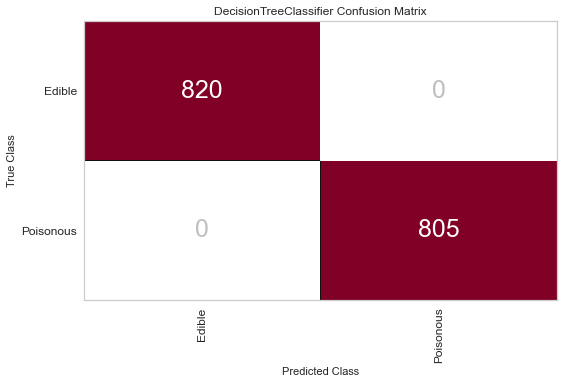

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [181]:
#get model accuracy and create a confusion matrix

#create class labels for confusion matrix
# classes: (p=1 and e=0)
label_encoder = {0: 'Edible', 1: 'Poisonous'}

#initialize the confusion matrix
cm = ConfusionMatrix(clf_model, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_mush, y_test_mush)

#creates the confusion matrix and gets the accuracy
mod_acc = 100*cm.score(X_test_mush, y_test_mush)
print('Model Accuracy: ', round(mod_acc,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

In [182]:
# Double check the above Confusion Matrix using a different library and coding (sklearn metrics and confusion_matrix)
## Print accuracy of model on test data
print("Accuracy: " + str(round(metrics.accuracy_score(y_test_mush, y_pred_mush) * 100)) + '%')

## Print confusion matrix of model on test data
print('\nConfusion Matrix:')
print(pd.DataFrame(metrics.confusion_matrix(y_test_mush, y_pred_mush)).set_axis(['Edible', 'Poisonous'], axis=1).rename({0 : 'Edible', 1 : 'Poisonous'}, axis=0))

Accuracy: 100%

Confusion Matrix:
           Edible  Poisonous
Edible        820          0
Poisonous       0        805


### 6. Create a visualization of the decision tree.

In [165]:
feature_names = list(df_mush.drop(['Class_Coded'], axis=1).columns)
feature_names

['stalk-shape_e',
 'stalk-shape_t',
 'stalk-color-below-ring_b',
 'stalk-color-below-ring_c',
 'stalk-color-below-ring_e',
 'stalk-color-below-ring_g',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_o',
 'stalk-color-below-ring_p',
 'stalk-color-below-ring_w',
 'stalk-color-below-ring_y',
 'stalk-root_?',
 'stalk-root_b',
 'stalk-root_c',
 'stalk-root_e',
 'stalk-root_r',
 'gill-spacing_c',
 'gill-spacing_w',
 'cap-surface_f',
 'cap-surface_g',
 'cap-surface_s',
 'cap-surface_y',
 'bruises_f',
 'bruises_t',
 'gill-attachment_a',
 'gill-attachment_f',
 'veil-type_p',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_m',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'cap-shape_b',
 'cap-shape_c',
 'cap-shape_f',
 'cap-shape_k',
 'cap-shape_s',
 'cap-shape_x',
 'gill-size_b',
 'gill-size_n',
 'stalk-color-above-ring_b',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color-above-ring_o',
 'stalk-color-above

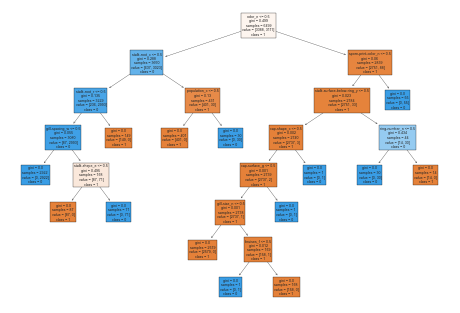

In [166]:
# training the Decision Tree Classifier
clf_model = DecisionTreeClassifier() 
#clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=10, min_samples_leaf=20)   
clf_model.fit(X_train_mush,y_train_mush)

from sklearn import tree as t

feature_names = list(df_mush.drop(['Class_Coded'], axis=1).columns)
target_names = [str(s) for s in df_mush_Class]
tree = t.plot_tree(clf_model, filled=True, feature_names=feature_names, class_names=target_names)

### 7. Use a χ2-statistic selector to pick the five best features for this data (see section 10.4 of the Machine Learning with Python Cookbook).

In [167]:
# Load libraries (pg. 174)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [168]:
# Create target and feature_names list
features = X_train_mush
target = y_train_mush

In [169]:
# Convert to categorical data by converting data into integers
features = features.astype(int)

In [170]:
# Select 5 features with highest chi-squared statistics
chi2_selector=SelectKBest(chi2, k=5)
features_kbest = chi2_selector.fit_transform(features, target)

In [171]:
# Show results
print ("Original number of features:", features.shape[1])
print ("Reduced number of features:", features_kbest.shape[1])

Original number of features: 117
Reduced number of features: 5


### 8. Which five features were selected in step 7? Hint: Use the get_support function.

In [172]:
# Get columns to keep and create new dataframe with those only
cols = chi2_selector.get_support(indices=True)
features_df_new = features.iloc[:,cols]
features_df_new

,odor_f,odor_n,stalk-surface-below-ring_k,gill-color_b,stalk-surface-above-ring_k
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,1,1,1
3,0,0,0,1,1
4,0,1,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,1,0,0,0
8,0,0,1,1,1
9,0,1,0,0,0


In [546]:
# Check shape of new df
features_df_new.shape

(6499, 5)

### 9. Repeat steps 4 and 5 with the five best features selected in step 7.

In [173]:
# STEP 3: split the data into a training and test set
X_mush_chi = df_mush[['odor_f', 'odor_n', 'stalk-surface-below-ring_k', 'gill-color_b', 'stalk-surface-above-ring_k']]
#get the target
y_mush_chi = df_mush['Class_Coded']

In [174]:
#split the data into training and test sets (80% Training/20% Test)
X_train_mush_chi, X_test_mush_chi, y_train_mush_chi, y_test_mush_chi = train_test_split(X_mush_chi, y_mush_chi, test_size = 0.2)

In [175]:
#reset indices in the training and test sets to prevent pandas slicing warnings
X_train_mush_chi = X_train_mush_chi.reset_index(drop = True) #drop + True drops the previous index
X_test_mush_chi = X_test_mush_chi.reset_index(drop = True)
y_train_mush_chi = y_train_mush_chi.reset_index(drop = True)
y_test_mush_chi = y_test_mush_chi.reset_index(drop = True)

In [176]:
# STEP 4: training the Decision Tree Classifier
clf_model_5 = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf_model_5.fit(X_train_mush_chi,y_train_mush_chi)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

Model Accuracy: 88.31%


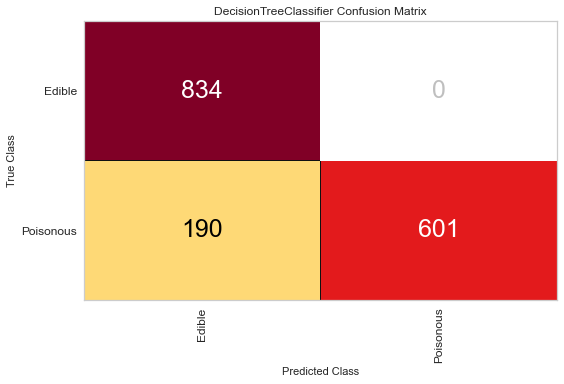

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [177]:
# STEP 5: get model accuracy and create a confusion matrix

#create class labels for confusion matrix
# classes: (p=1 and e=0)
label_encoder = {0: 'Edible', 1: 'Poisonous'}

#initialize the confusion matrix
cm= ConfusionMatrix(clf_model_5, encoder = label_encoder,  percent=False)

#fit the test set to the confusion matrix
cm.fit(X_test_mush_chi, y_test_mush_chi)

#creates the confusion matrix and gets the accuracy
mod_acc_chi = 100*cm.score(X_test_mush_chi, y_test_mush_chi)
print('Model Accuracy: ', round(mod_acc_chi,2), '%', sep = '')

#change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(25)

#display the confusion matrix
cm.show()

### 10. Summarize your findings.

## Findings: With all the features in the first Decision Tree Classifier there was 100% accuracy (can't do better than that!), and after reducing to 5 best features using X2 it went down to 88.31%.  However, this revised accuracy is still high with only 5 features instead of 117 - a good piece of information to have when you do Feature Reduction. You can still get a relatively good accuracy percentage with 95% reduction in features.  